In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
data_url='https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/ner_dataset.csv'
urllib.request.urlretrieve(data_url, filename="ner_dataset.csv")
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [3]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
print(f'데이터프레임 행의 수: {len(data)}')

데이터프레임 행의 수: 1048575


In [5]:
print('어떤 열에 Null값이 있는지 출력')
print('==============================')
data.isnull().sum()

어떤 열에 Null값이 있는지 출력


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [6]:
print(f"sentence # 열의 중복을 제거한 값의 개수: {data['Sentence #'].nunique()}")
print(f'Word 열의 중복을 제거한 값의 개수: {data.Word.nunique()}')
print(f'Tag 열의 중복을 제거한 값의 개수: {data.Tag.nunique()}')

sentence # 열의 중복을 제거한 값의 개수: 47959
Word 열의 중복을 제거한 값의 개수: 35178
Tag 열의 중복을 제거한 값의 개수: 17


In [7]:
print('Tag 열의 각각의 값의 개수 카운트')
print('================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [8]:
print('======변경 전======')
print(data.tail())
data = data.fillna(method="ffill")
print('======변경 후======')
print(data.tail())

======변경 전======
        Sentence #       Word  POS Tag
1048570        NaN       they  PRP   O
1048571        NaN  responded  VBD   O
1048572        NaN         to   TO   O
1048573        NaN        the   DT   O
1048574        NaN     attack   NN   O
======변경 후======
              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [9]:
print('어떤 열에 Null값이 있는지 출력')
print('==============================')
data.isnull().sum()
#print(f'데이터에 Null 값이 있는지 유무: {data.isnull().values.any()}')

어떤 열에 Null값이 있는지 출력


Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

In [10]:
data['Word'] = data['Word'].str.lower()
print(f'Word 열의 중복을 제거한 값의 개수: {data.Word.nunique()}')
print(data[:5])

Word 열의 중복을 제거한 값의 개수: 31817
    Sentence #           Word  POS Tag
0  Sentence: 1      thousands  NNS   O
1  Sentence: 1             of   IN   O
2  Sentence: 1  demonstrators  NNS   O
3  Sentence: 1           have  VBP   O
4  Sentence: 1        marched  VBN   O


In [11]:
#단어와 태깅 정보를 묶어야 함

func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("Sentence #").apply(func)]
print(f'전체 샘플 개수: {len(tagged_sentences)}')
print(tagged_sentences[0]) # 첫번째 샘플 출력

전체 샘플 개수: 47959
[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [12]:
#단어와 태깅 정보를 분리

sentences, ner_tags = [], [] 

# 47,959개의 문장 샘플을 1개씩 불러온다.
for tagged_sentence in tagged_sentences: 
    # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentence, tag_info = zip(*tagged_sentence) 
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이: 104
샘플의 평균 길이: 21.863987989741236


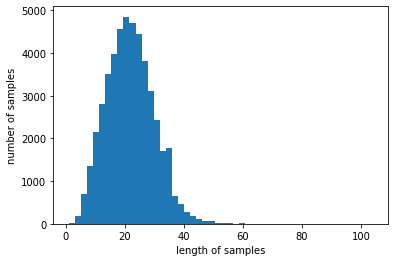

In [13]:
print(f'샘플의 최대 길이: {max(len(l) for l in sentences)}')
print(f'샘플의 평균 길이: {sum(map(len, sentences))/len(sentences)}')
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [14]:
# 모든 단어를 사용하며 인덱스 1에는 단어 'OOV'를 할당.
src_tokenizer = Tokenizer(oov_token='OOV')
# 태깅 정보들은 내부적으로 대문자를 유지한 채 저장
tar_tokenizer = Tokenizer(lower=False)

src_tokenizer.fit_on_texts(sentences)
tar_tokenizer.fit_on_texts(ner_tags)

vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print(f'단어 집합의 크기: {vocab_size}')
print(f'개체명 태깅 정보 집합의 크기: {tag_size}')
print(f'단어 OOV의 인덱스: {src_tokenizer.word_index["OOV"]}')

#정수 인코딩
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)


단어 집합의 크기: 31819
개체명 태깅 정보 집합의 크기: 18
단어 OOV의 인덱스: 1


In [1]:
# char_vocab 만들기
words = list(set(data["Word"].values))
chars = set([w_i for w in words for w_i in w])
chars = sorted(list(chars))
print(f'문자 집합: {chars}')

NameError: name 'data' is not defined

In [15]:
print(X_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [16]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [17]:
decoded = []
for index in X_data[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print(f'기존 문장: {sentences[0]}')
print(f'디코딩 문장: {decoded}')

기존 문장: ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장: ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [18]:
max_len = 70
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

X_train, X_test, y_train_int, y_test_int = train_test_split(X_data, y_data, 
                                                            test_size=.4, 
                                                            random_state=777)
X_test, X_val, y_test_int, y_val_int = train_test_split(X_data, y_data, 
                                                            test_size=.5, 
                                                            random_state=777)

#레이블에 해당하는 태깅 정보를 원-핫 인코딩 적용
y_train = to_categorical(y_train_int, num_classes=tag_size)
y_val = to_categorical(y_val_int, num_classes=tag_size)
y_test = to_categorical(y_test_int, num_classes=tag_size)

print(f'훈련 샘플 문장의 크기: {X_train.shape}')
print(f'훈련 샘플 레이블(정수 인코딩)의 크기: {y_train_int.shape}')
print(f'훈련 샘플 레이블(원-핫 인코딩)의 크기: {y_train.shape}')
print(f'검증 샘플 문장의 크기: {X_val.shape}')
print(f'검증 샘플 레이블(정수 인코딩)의 크기: {y_val_int.shape}')
print(f'검증 샘플 레이블(원-핫 인코딩)의 크기: {y_val.shape}')

print(f'테스트 샘플 문장의 크기: {X_test.shape}')
print(f'테스트 샘플 레이블(정수 인코딩)의 크기: {y_test_int.shape}')
print(f'테스트 샘플 레이블(원-핫 인코딩)의 크기: {y_test.shape}')


훈련 샘플 문장의 크기: (28775, 70)
훈련 샘플 레이블(정수 인코딩)의 크기: (28775, 70)
훈련 샘플 레이블(원-핫 인코딩)의 크기: (28775, 70, 18)
검증 샘플 문장의 크기: (23980, 70)
검증 샘플 레이블(정수 인코딩)의 크기: (23980, 70)
검증 샘플 레이블(원-핫 인코딩)의 크기: (23980, 70, 18)
테스트 샘플 문장의 크기: (23979, 70)
테스트 샘플 레이블(정수 인코딩)의 크기: (23979, 70)
테스트 샘플 레이블(원-핫 인코딩)의 크기: (23979, 70, 18)


In [19]:
!pip install keras-crf

In [20]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_crf import CRFModel
from seqeval.metrics import f1_score, classification_report

embedding_dim = 128
hidden_units = 64
dropout_ratio = 0.3

sequence_input = Input(shape=(max_len,),dtype=tf.int32, name='sequence_input')

model_embedding = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len)(sequence_input)

model_bilstm = Bidirectional(LSTM(units=hidden_units, 
                                  return_sequences=True))(model_embedding)

model_dropout = TimeDistributed(Dropout(dropout_ratio))(model_bilstm)

model_dense = TimeDistributed(Dense(tag_size, activation='relu'))(model_dropout)

base = Model(inputs=sequence_input, outputs=model_dense)
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

2022-10-05 14:52:56.166411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 14:52:56.174623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 14:52:56.175086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 14:52:56.175963: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_crf/cp.ckpt', 
                     monitor='val_decode_sequence_accuracy', 
                     mode='max', verbose=1, 
                     save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train_int, 
                    batch_size=128, epochs=30, 
                    validation_data=(X_val, y_val_int), callbacks=[mc, es])

Epoch 1/30


2022-10-05 14:53:01.702321: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


225/225 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9044 - loss: 29.9372
Epoch 1: val_decode_sequence_accuracy improved from -inf to 0.95201, saving model to bilstm_crf/cp.ckpt
225/225 [==============================] - 24s 88ms/step - decode_sequence_accuracy: 0.9044 - loss: 29.8624 - val_decode_sequence_accuracy: 0.9520 - val_loss: 11.1590
Epoch 2/30
225/225 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9651 - loss: 8.5551
Epoch 2: val_decode_sequence_accuracy improved from 0.95201 to 0.97585, saving model to bilstm_crf/cp.ckpt
225/225 [==============================] - 19s 84ms/step - decode_sequence_accuracy: 0.9651 - loss: 8.5451 - val_decode_sequence_accuracy: 0.9759 - val_loss: 5.1076
Epoch 3/30
225/225 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9789 - loss: 5.2305
Epoch 3: val_decode_sequence_accuracy improved from 0.97585 to 0.98196, saving model to bilstm_crf/cp.ckpt
225/225 [===============

225/225 [==============================] - 17s 77ms/step - decode_sequence_accuracy: 0.9963 - loss: 0.3344 - val_decode_sequence_accuracy: 0.9867 - val_loss: 0.1472
Epoch 24/30
225/225 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9965 - loss: 0.3015
Epoch 24: val_decode_sequence_accuracy did not improve from 0.98698
225/225 [==============================] - 18s 78ms/step - decode_sequence_accuracy: 0.9965 - loss: 0.3019 - val_decode_sequence_accuracy: 0.9862 - val_loss: 0.0697
Epoch 25/30
225/225 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9967 - loss: 0.2807
Epoch 25: val_decode_sequence_accuracy did not improve from 0.98698
225/225 [==============================] - 18s 78ms/step - decode_sequence_accuracy: 0.9967 - loss: 0.2810 - val_decode_sequence_accuracy: 0.9861 - val_loss: 0.0749
Epoch 26/30
225/225 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9969 - loss: 0.2542
Epoch 26: val_decode_sequence_

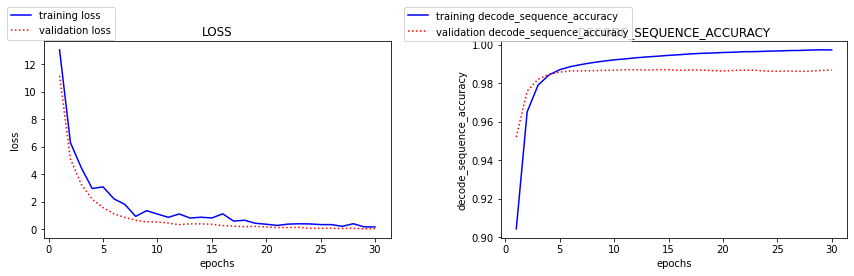

In [24]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , 
               fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in 
                          list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

model.load_weights('bilstm_crf/cp.ckpt')
#print("테스트 정확도: %.4f" % (model.evaluate(X_test, y_test_int)[1]))
plot_history(history)

In [25]:
i = 13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]]))[0] # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
labels = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
cheney           : B-per   B-per
's               : O       O
stop             : O       O
in               : O       O
iraq             : B-geo   B-geo
is               : O       O
part             : O       O
of               : O       O
a                : O       O
middle           : B-geo   B-geo
east             : I-geo   I-geo
tour             : O       O
that             : O       O
will             : O       O
take             : O       O
him              : O       O
to               : O       O
oman             : B-geo   B-geo
,                : O       O
saudi            : B-geo   B-geo
arabia           : I-geo   I-geo
,                : O       O
israel           : B-geo   B-geo
,                : O       O
the              : O       O
west             : B-org   B-org
bank             : I-org   I-org
and              : I-org   I-org
turkey           : I-org   I-org
.                : O       O


In [26]:
y_predicted = model.predict(X_test)[0]
print(y_predicted[:2])

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 7 7 7 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 1 4 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [28]:
from seqeval.metrics import f1_score, classification_report


def sequences_to_tag(sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result



def sequences_to_tag_for_crf(sequences): 
    result = []
    # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
    for sequence in sequences: 
        word_sequence = []
        # 시퀀스로부터 예측 정수 레이블을 하나씩 꺼낸다.
        for pred_index in sequence:
            # index_to_ner을 사용하여 정수를 태깅 정보로 변환. 'PAD'는 'O'로 변경.
            word_sequence.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(word_sequence)
    return result

pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 94.9%
              precision    recall  f1-score   support

         art       0.82      0.68      0.74       202
         eve       0.76      0.57      0.65       159
         geo       0.95      0.98      0.96     18828
         gpe       0.98      0.96      0.97      7960
         nat       0.71      0.56      0.63       103
         org       0.92      0.87      0.90     10092
         per       0.95      0.93      0.94      8465
         tim       0.98      0.97      0.97     10129

   micro avg       0.95      0.95      0.95     55938
   macro avg       0.88      0.82      0.85     55938
weighted avg       0.95      0.95      0.95     55938

